In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from FewShotTestHandler import extract_test_result_sequence

In [3]:
results = pd.read_csv("test_results.csv")

In [4]:
def plot(x_col, y_col, plot_descriptor_cols, line_descriptor_cols, filter_dict):
    grouped_results = extract_test_result_sequence(results, x_col, y_col, filter=filter_dict)
    print(f"{len(grouped_results)} Overall Lines")
    
    plot_descriptors = grouped_results.reset_index().groupby(plot_descriptor_cols, as_index=False).agg({"index": list})
    print(f"{len(plot_descriptors)} Separate Plots")
    
    for plot_descriptor in plot_descriptors.itertuples():
        plot_name = ", ".join([f"{col}: {getattr(plot_descriptor, col)}" for col in plot_descriptor_cols])
        
        fig, ax = plt.subplots(figsize=(8,4))
        fig.suptitle(plot_name)
        
        lines = grouped_results.loc[plot_descriptor.index].reset_index()
        
        for i in range(len(lines)):
            line_name = ", ".join([f"{col}: {lines.loc[i, col]}" for col in line_descriptor_cols])
            x, y = lines.loc[i, [x_col, y_col]]
        
            if x_col == "classifier.text_weight" and lines.loc[i, "n_support"] == 0 and len(x) == 1:
                ax.axhline(y[0], label=line_name, linestyle="dashed")
            else:
                ax.plot(x, y, label=line_name)
        
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        fig.show()

122 Overall Lines
24 Separate Plots


/tmp/ipykernel_1449197/886711974.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,4))


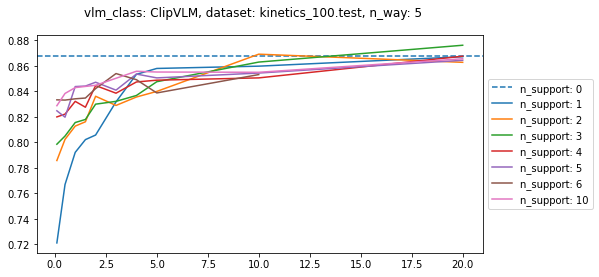

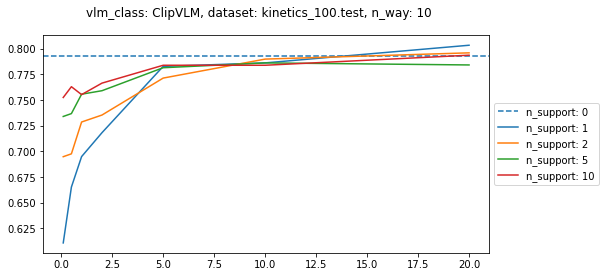

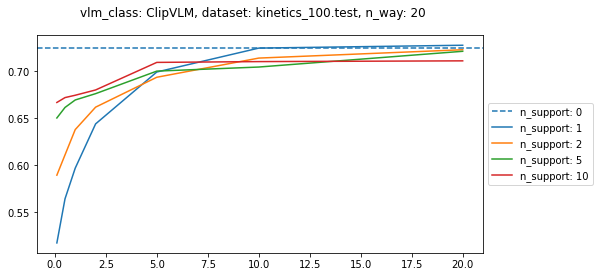

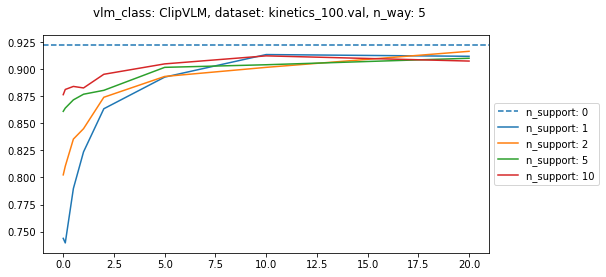

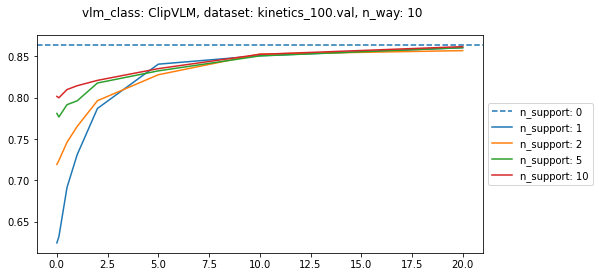

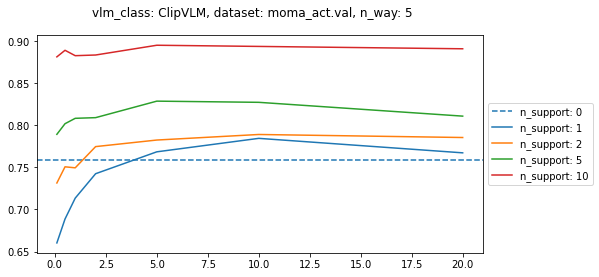

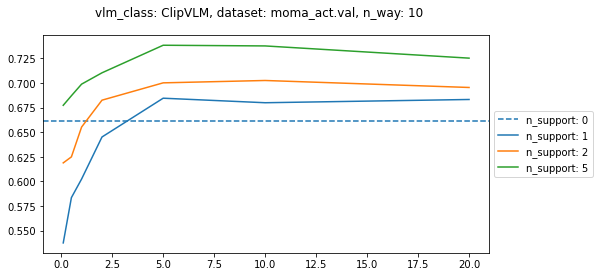

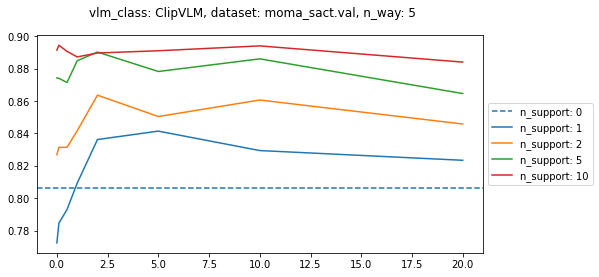

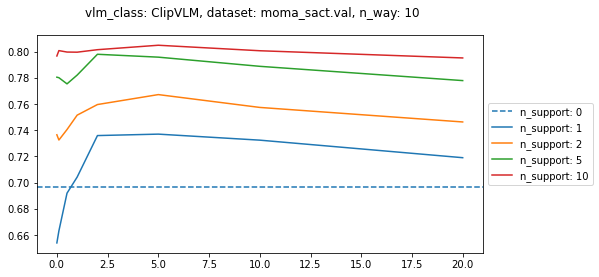

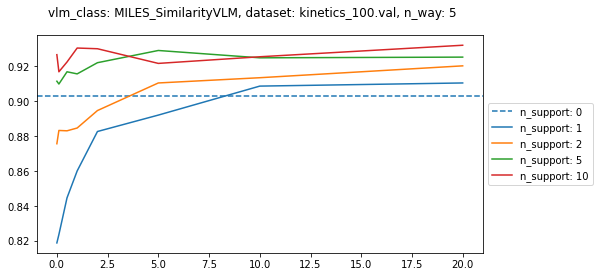

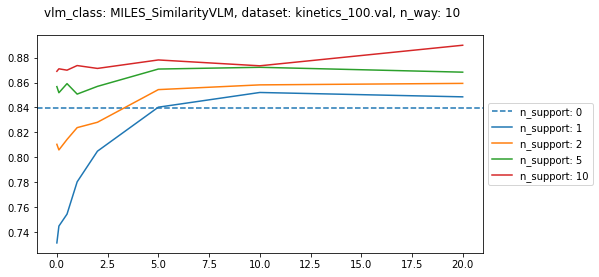

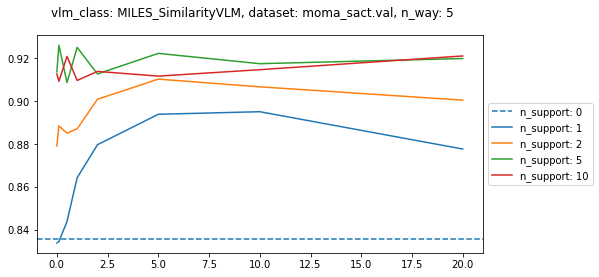

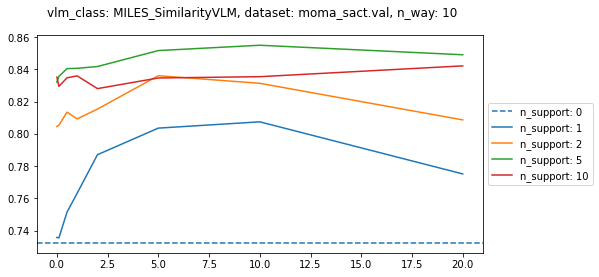

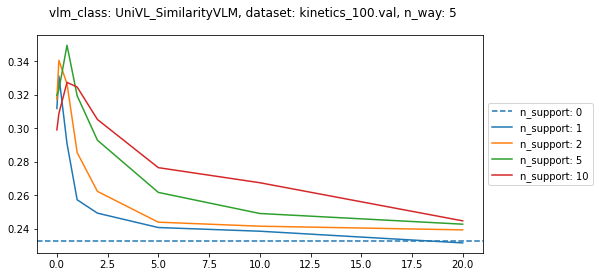

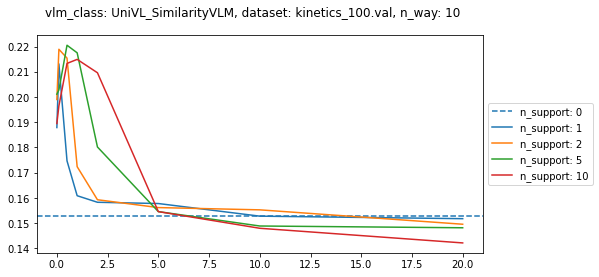

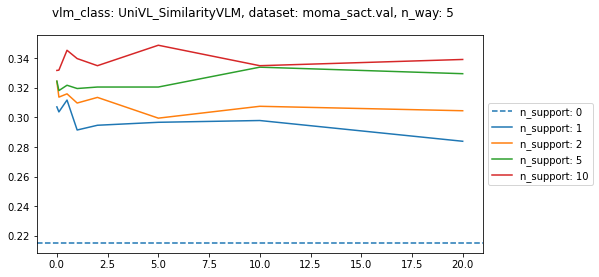

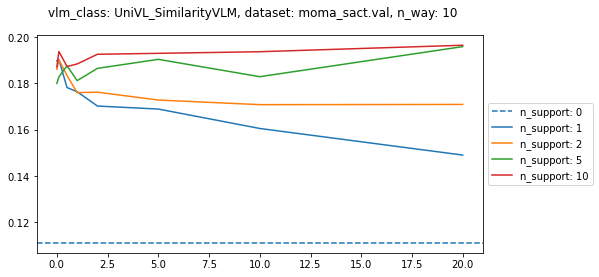

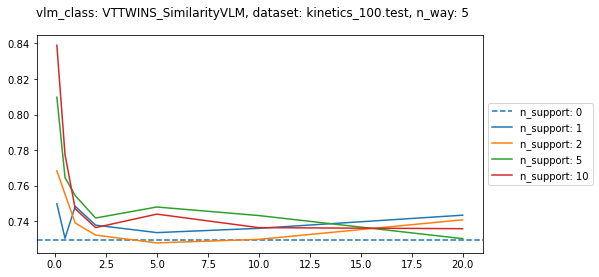

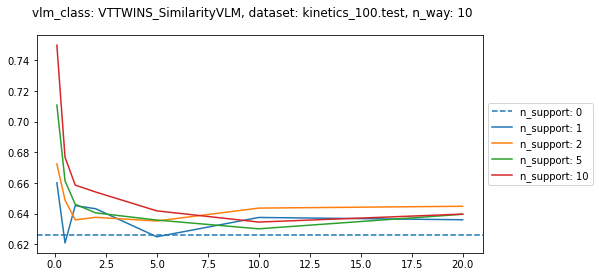

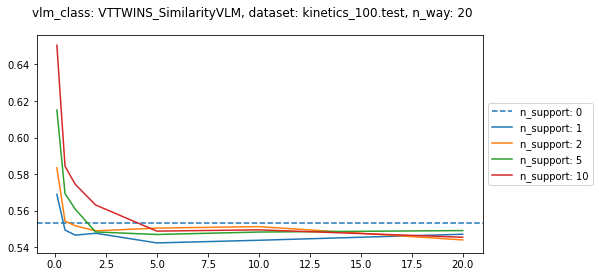

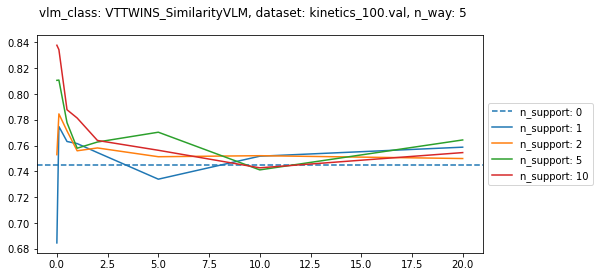

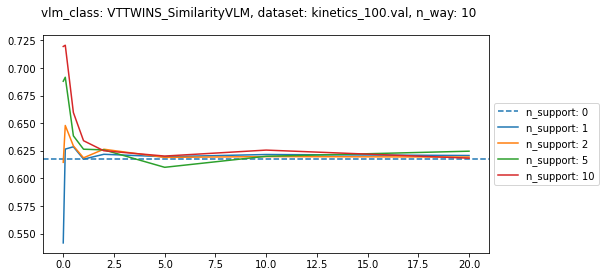

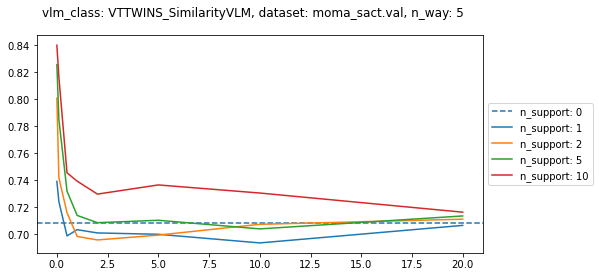

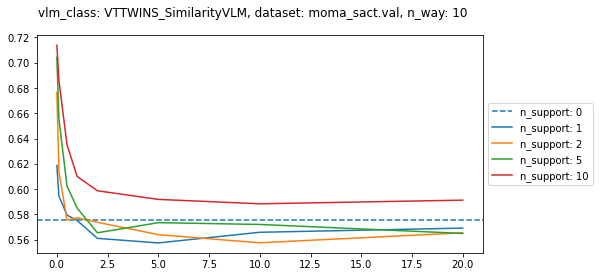

In [5]:
x_col = "classifier.text_weight"
y_col = "accuracy"
plot_descriptor_cols = ["vlm_class", "dataset", "n_way"]    # Create a separate plot for each value of these
line_descriptor_cols = ["n_support"]                        # Create a separate line (with these cols as legend) for each unique val of these

filter_dict = {
    "classifier_class": "WeightedTextFewShotClassifier"
}

plot(x_col, y_col, plot_descriptor_cols, line_descriptor_cols, filter_dict)

187 Overall Lines
24 Separate Plots


/tmp/ipykernel_1449197/886711974.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,4))


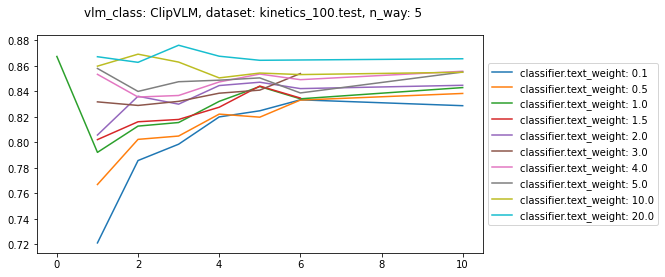

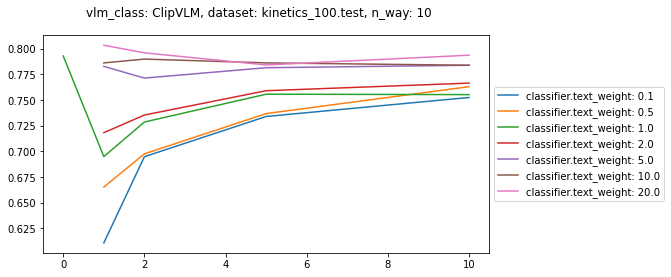

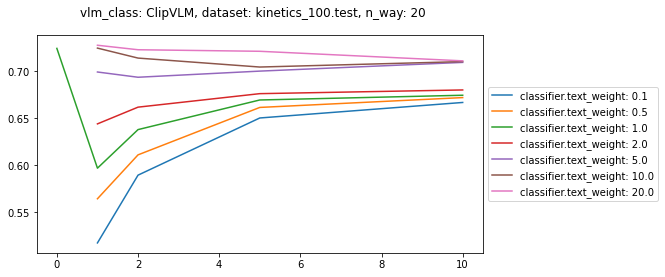

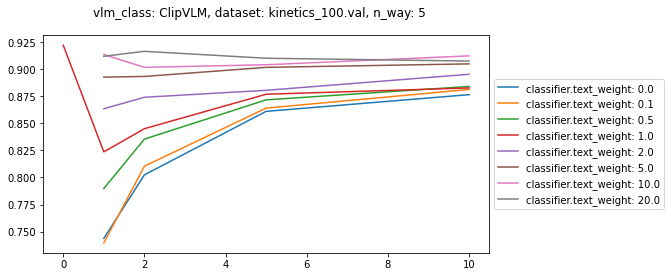

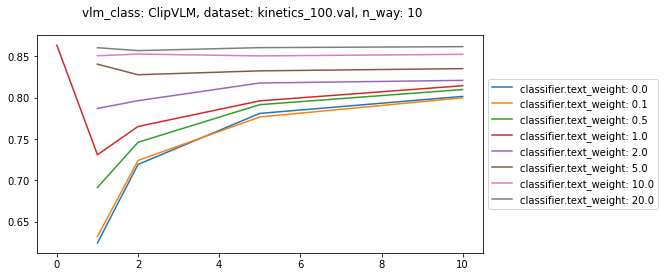

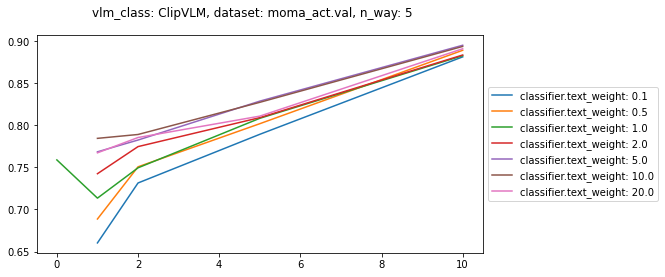

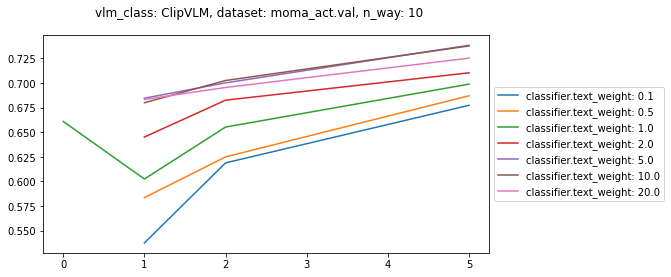

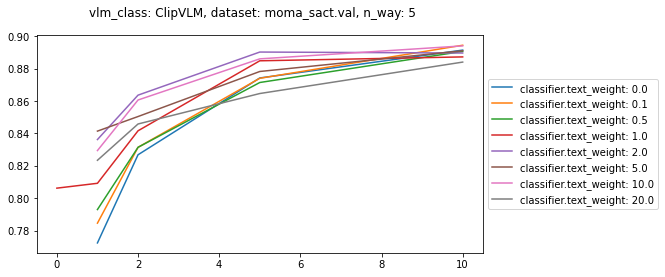

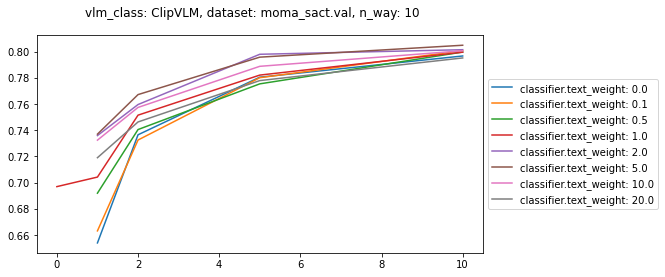

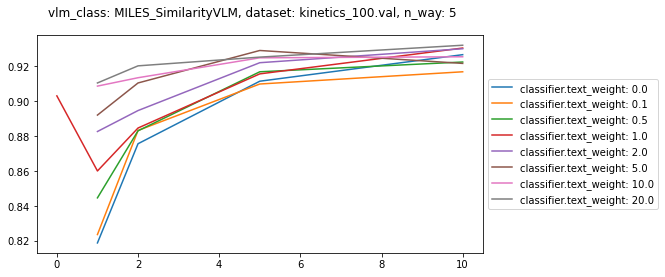

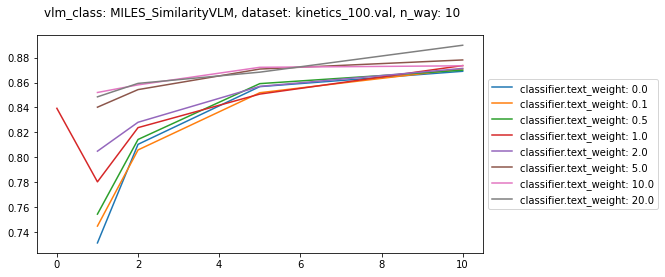

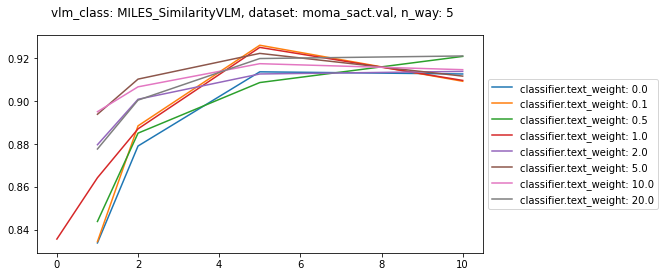

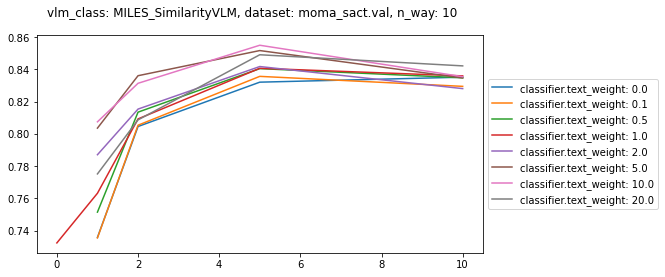

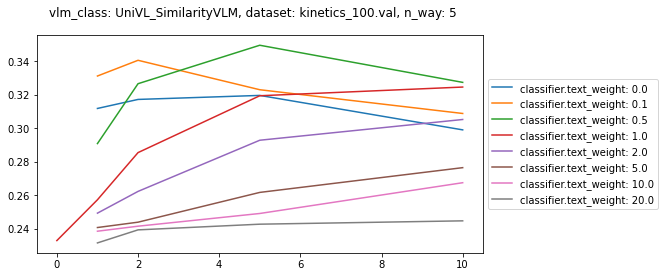

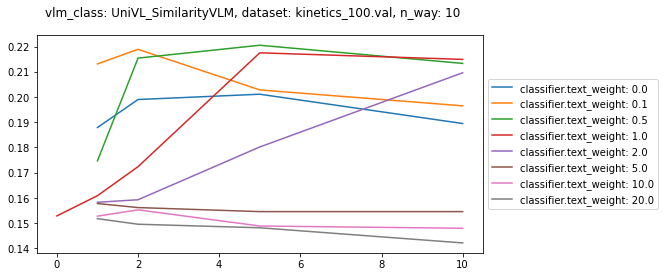

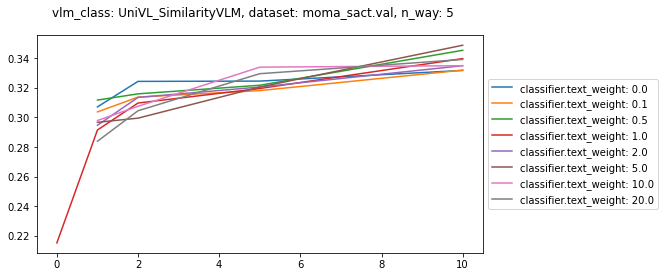

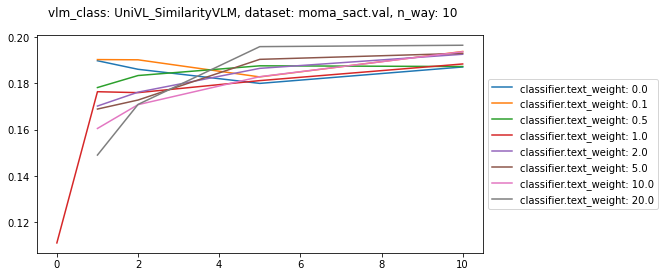

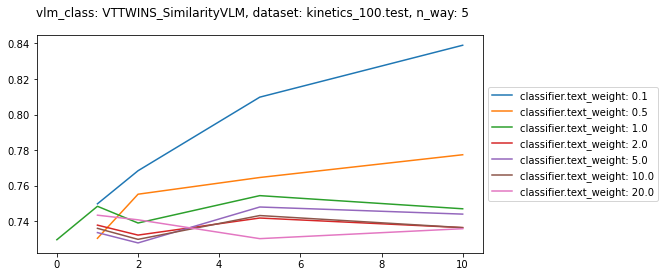

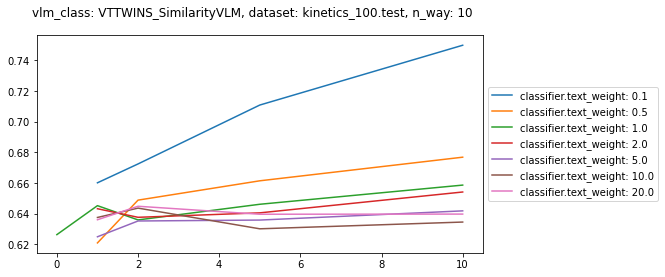

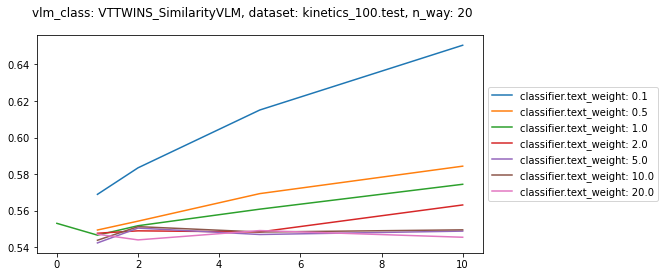

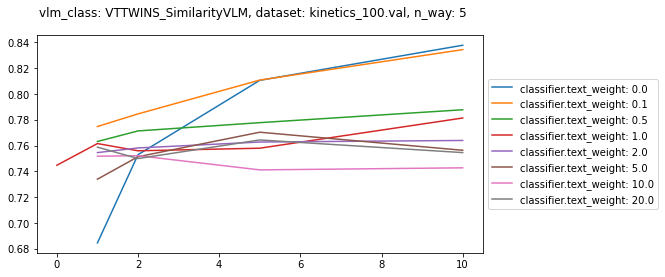

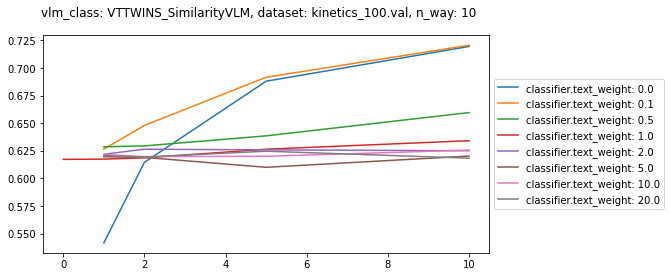

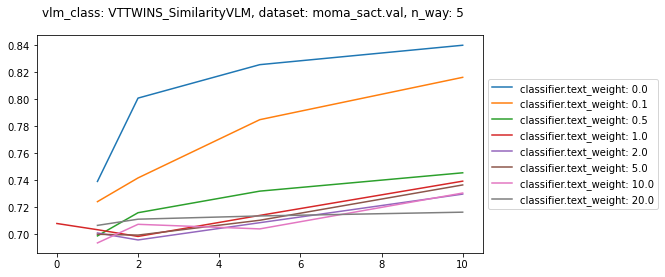

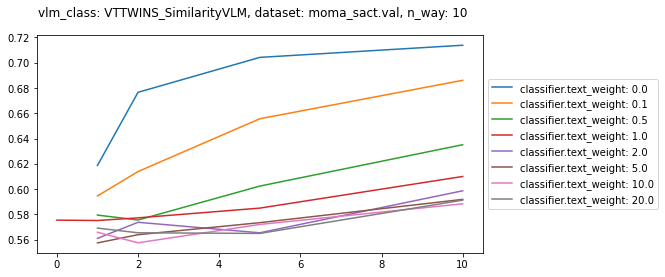

In [6]:
x_col = "n_support"
y_col = "accuracy"
plot_descriptor_cols = ["vlm_class", "dataset", "n_way"]    # Create a separate plot for each value of these
line_descriptor_cols = ["classifier.text_weight"]           # Create a separate line (with these cols as legend) for each unique val of these

filter_dict = {
    "classifier_class": "WeightedTextFewShotClassifier"
}

plot(x_col, y_col, plot_descriptor_cols, line_descriptor_cols, filter_dict)